<a href="https://colab.research.google.com/github/cjrincon/Proyecto_Deep_Learning/blob/main/Proyecto_Deep_Catherine_Rincon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto**

El proyecto pretende predecir la vida útil remanente RUL a partir de una red LSTM.


Datos de entrada:


Datos de salida:



## Cargar las librerías necesarias para el desarrollo del proyecto

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de los datos

In [ ]:
# Datos de la batería #5
bat_5 = pd.read_csv('/content/drive/MyDrive/Maestría/Proyecto/raw_data_05.csv')
# Datos de la batería #6
bat_6 = pd.read_csv('/content/drive/MyDrive/Maestría/Proyecto/raw_data_06.csv')
# Datos de la batería #7
bat_7 = pd.read_csv('/content/drive/MyDrive/Maestría/Proyecto/raw_data_07.csv')
# Datos de la batería #18
bat_18 = pd.read_csv('/content/drive/MyDrive/Maestría/Proyecto/raw_data_18.csv')

In [ ]:
bat_5.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


In [ ]:
# Se agrega una columna para identificar cada tipo de batería
bat_5 = bat_5.assign(battery=5)
bat_6 = bat_6.assign(battery=6)
bat_7 = bat_7.assign(battery=7)
bat_18 = bat_18.assign(battery=18)

In [ ]:
# Se crea una base de datos consolidando los datos de las 4 baterías
data = pd.concat([bat_5, bat_6, bat_7, bat_18])
data

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,battery
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,5
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,5
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,5
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,5
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,5
...,...,...,...,...,...,...,...,...,...,...,...
34861,132,24,2008-08-20 08:37:19,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,18
34862,132,24,2008-08-20 08:37:19,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,18
34863,132,24,2008-08-20 08:37:19,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,18
34864,132,24,2008-08-20 08:37:19,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,18


In [ ]:
# Se valida el tipo de dato y si hay nulos en la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185721 entries, 0 to 34865
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 185721 non-null  int64  
 1   ambient_temperature   185721 non-null  int64  
 2   datetime              185721 non-null  object 
 3   capacity              185721 non-null  float64
 4   voltage_measured      185721 non-null  float64
 5   current_measured      185721 non-null  float64
 6   temperature_measured  185721 non-null  float64
 7   current_load          185721 non-null  float64
 8   voltage_load          185721 non-null  float64
 9   time                  185721 non-null  float64
 10  battery               185721 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 17.0+ MB


In [ ]:
# Se validan las medidas estadísticas de cada columna
data.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,battery
count,185721.000000,185721.0,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000
mean,82.838758,24.0,1.574863,3.497219,-1.832569,32.378997,1.465434,2.366494,1546.379935,8.252799
std,45.692247,0.0,0.190633,0.251691,0.561405,4.027737,1.226874,0.751377,906.958628,4.743428
min,1.000000,24.0,1.153818,1.737030,-2.029098,22.350256,-2.000000,0.000000,0.000000,5.000000
25%,45.000000,24.0,1.426025,3.377653,-2.011418,29.570621,1.998200,2.410000,764.797000,5.000000
50%,81.000000,24.0,1.559634,3.500859,-2.009015,32.355737,1.998800,2.558000,1537.031000,6.000000
75%,120.000000,24.0,1.741850,3.655751,-1.989974,35.420677,1.999000,2.718000,2307.485000,7.000000
max,168.000000,24.0,2.035338,4.233325,0.014306,42.332522,2.000000,4.249000,3690.234000,18.000000


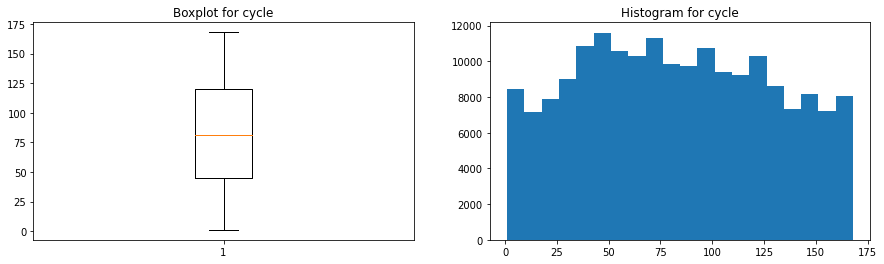

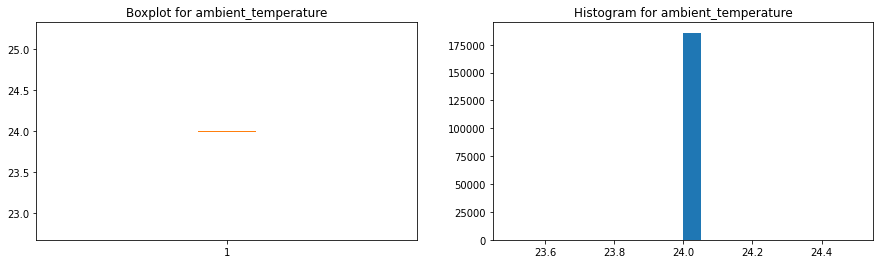

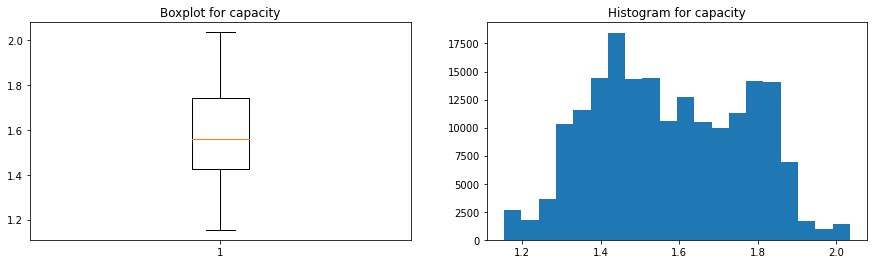

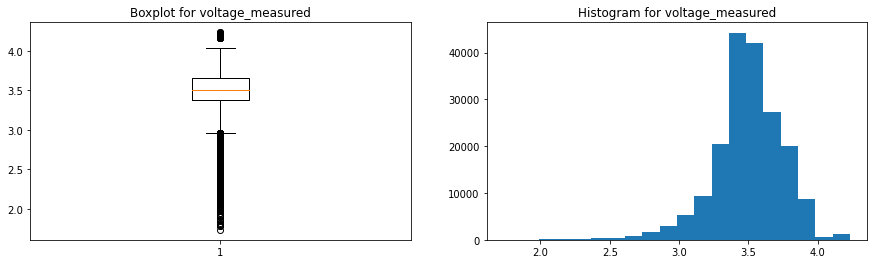

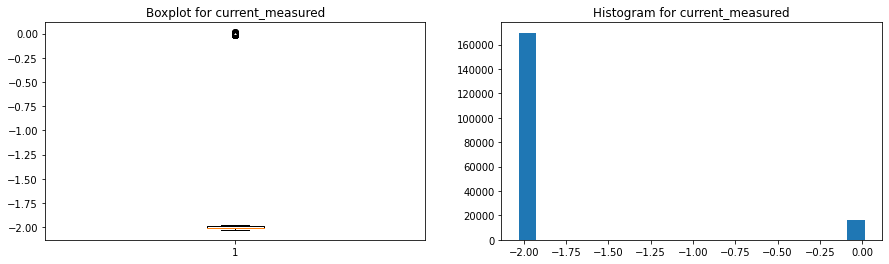

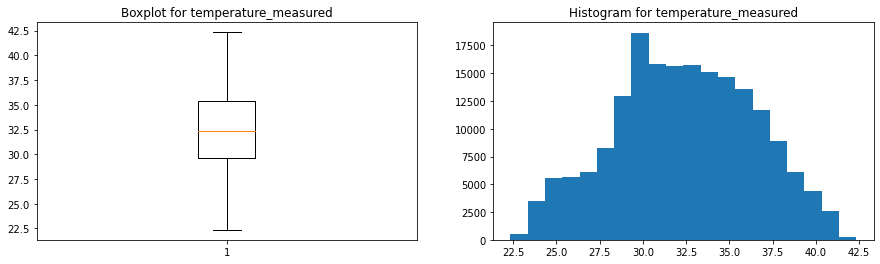

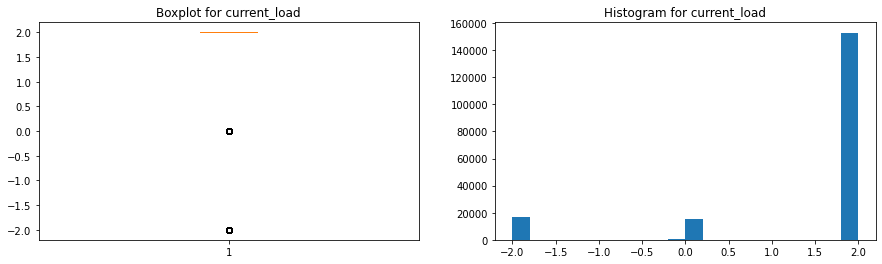

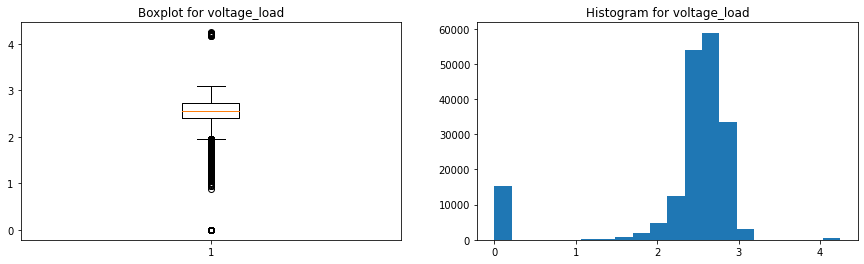

In [ ]:
for feature in ['cycle', 'ambient_temperature', 'capacity', 'voltage_measured', 'current_measured', 
                    'temperature_measured', 'current_load', 'voltage_load']:
    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = data[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(feature) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(feature) )

    # Display
    plt.show()

In [ ]:
# Dado que la variable temperatura ambiente es constante, se elimina de los archivos
data.pop('ambient_temperature')
data.head()

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,battery
0,1,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,5
1,1,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,5
2,1,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,5
3,1,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,5
4,1,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,5


In [ ]:
# Se valida el número de ciclos por batería
data.groupby('battery')['cycle'].max()

battery
5     168
6     168
7     168
18    132
Name: cycle, dtype: int64

In [ ]:
# Matriz de correlaciones
corr_data = data.corr()
print(corr_data, "\n")

                         cycle  capacity  voltage_measured  current_measured  \
cycle                 1.000000 -0.924433         -0.142041          0.132452   
capacity             -0.924433  1.000000          0.165433         -0.163532   
voltage_measured     -0.142041  0.165433          1.000000         -0.083980   
current_measured      0.132452 -0.163532         -0.083980          1.000000   
temperature_measured  0.152562 -0.137249         -0.885815          0.318778   
current_load          0.369781 -0.387503         -0.037141         -0.366280   
voltage_load         -0.185969  0.221651          0.416026         -0.896695   
time                 -0.115680  0.115478         -0.796901          0.358933   
battery              -0.237778  0.045500          0.007748         -0.019430   

                      temperature_measured  current_load  voltage_load  \
cycle                             0.152562      0.369781     -0.185969   
capacity                         -0.137249     -0.3

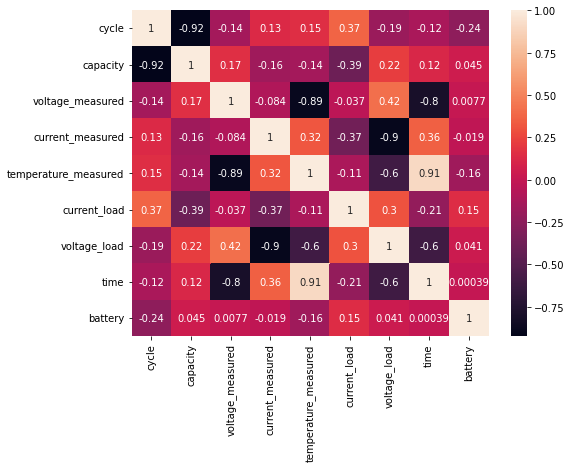

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True) # , cmap='YlGnBu'
plt.show()

In [ ]:
plot_d5 = data['battery'] == 5
plot_d5 = data[plot_d5]
plot_d6 = data['battery'] == 6
plot_d6 = data[plot_d6]
plot_d7 = data['battery'] == 7
plot_d7 = data[plot_d7]
plot_d18 = data['battery'] == 18
plot_d18 = data[plot_d18]

No handles with labels found to put in legend.


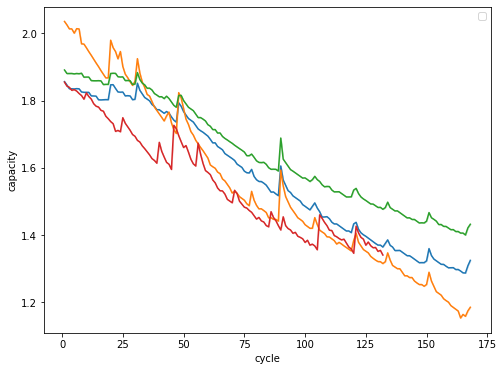

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='cycle', y='capacity', data=plot_d5)
sns.lineplot(x='cycle', y='capacity', data=plot_d6)
sns.lineplot(x='cycle', y='capacity', data=plot_d7)
sns.lineplot(x='cycle', y='capacity', data=plot_d18)

In [ ]:
data.groupby('battery')
data


## Exploración de los datos

## Cálculo del estado de salud - SOH

Teniendo en cuenta que el SOH de una batería se puede calcular a partir de la capacidad de la misma, se define el SOH como:



In [ ]:
# Se calcula el SOH y se asigna el número de la batería para
bat_5['SOH'] = bat_5['capacity']/bat_5['capacity'][0]
bat_5 = bat_5.assign(bateria=5)
bat_6['SOH'] = bat_6['capacity']/bat_5['capacity'][0]
bat_6 = bat_6.assign(bateria=6)
bat_7['SOH'] = bat_7['capacity']/bat_5['capacity'][0]
bat_7 = bat_7.assign(bateria=7)
bat_18['SOH'] = bat_18['capacity']/bat_5['capacity'][0]
bat_18 = bat_18.assign(bateria=18)

In [ ]:
data = pd.concat([bat_5, bat_6, bat_7, bat_18])

In [ ]:
data.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SOH,bateria
count,185721.000000,185721.0,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000
mean,82.838758,24.0,1.574863,3.497219,-1.832569,32.378997,1.465434,2.366494,1546.379935,0.848303,8.252799
std,45.692247,0.0,0.190633,0.251691,0.561405,4.027737,1.226874,0.751377,906.958628,0.102685,4.743428
min,1.000000,24.0,1.153818,1.737030,-2.029098,22.350256,-2.000000,0.000000,0.000000,0.621506,5.000000
25%,45.000000,24.0,1.426025,3.377653,-2.011418,29.570621,1.998200,2.410000,764.797000,0.768131,5.000000
50%,81.000000,24.0,1.559634,3.500859,-2.009015,32.355737,1.998800,2.558000,1537.031000,0.840099,6.000000
75%,120.000000,24.0,1.741850,3.655751,-1.989974,35.420677,1.999000,2.718000,2307.485000,0.938250,7.000000
max,168.000000,24.0,2.035338,4.233325,0.014306,42.332522,2.000000,4.249000,3690.234000,1.096338,18.000000


In [ ]:
data.groupby('bateria')['cycle'].max()

bateria
5     168
6     168
7     168
18    132
Name: cycle, dtype: int64

In [ ]:
data.groupby('bateria')['time'].mean()

bateria
5     1546.208924
6     1546.208924
7     1546.208924
18    1547.119848
Name: time, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)